# Análisis de Series Temporales

Demostración de un modelo ARIMA para pronosticar PM10.

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

## Carga y preparación de datos

In [ ]:
archivos = sorted(glob.glob('../data/Clean/datos_Clean_*.csv'))
dfs = [pd.read_csv(f, parse_dates=['DateTime']) for f in archivos]
datos = pd.concat(dfs)
datos = datos.set_index('DateTime').sort_index()
serie = datos['PM10'].dropna()

## Análisis y prueba de estacionariedad

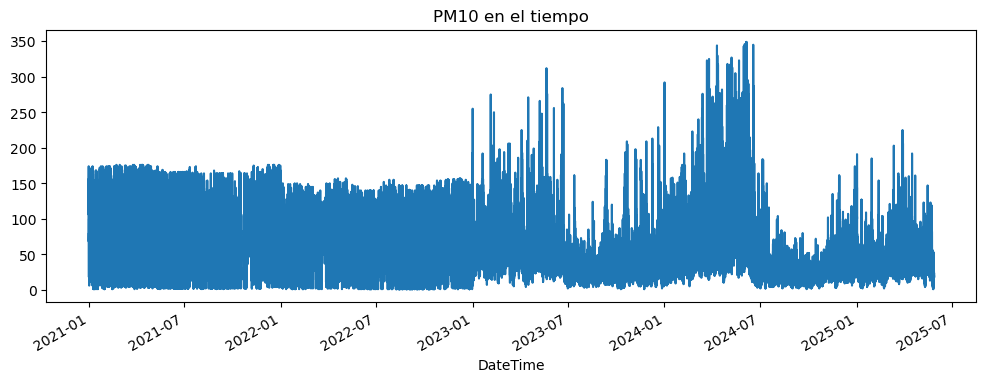

p-valor ADF: 1.5224838552155991e-25


In [6]:
serie.plot(figsize=(12,4))
plt.title('PM10 en el tiempo')
plt.show()
from statsmodels.tsa.stattools import adfuller
adf = adfuller(serie)
print('p-valor ADF:', adf[1])

## Modelo ARIMA y evaluación

In [8]:
train_size = int(len(serie)*0.8)
train, test = serie[:train_size], serie[train_size:]
modelo = ARIMA(train, order=(1,1,1))
resultado = modelo.fit()
predicciones = resultado.predict(start=test.index[0], end=test.index[-1])
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, predicciones)
print('MAE:', mae)

C:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vicma\anaconda3\envs\ml-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

## Comparación de valores reales vs. estimados

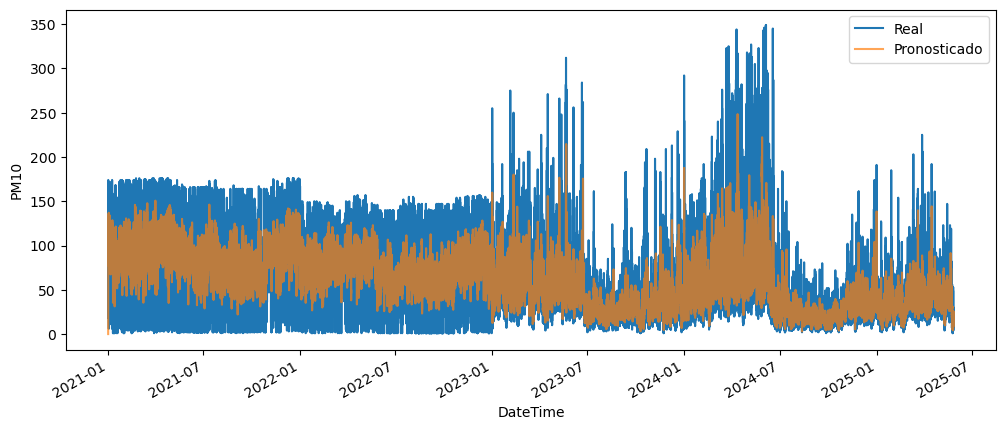

In [5]:
plt.figure(figsize=(12,5))
serie.plot(label='Real')
predicciones.plot(label='Pronosticado', alpha=0.7)
plt.legend()
plt.ylabel('PM10')
plt.show()